In [13]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.figure_factory as ff
from prettytable import PrettyTable
from sklearn.preprocessing import RobustScaler

from plotly.subplots import make_subplots


#Modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RepeatedKFold
import lightgbm as lgbm
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score      
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet, BayesianRidge
from sklearn.ensemble import AdaBoostRegressor




from catboost import CatBoostRegressor

#from sklego.linear_model import LADRegression
from xgboost import XGBRegressor
from scipy.stats import yeojohnson
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from mlxtend.regressor import StackingCVRegressor
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

# **2. Data Collection**

In [14]:
import pandas as pd

# Definisikan nama file
filename = "booking_dataset_2024_06_03.csv"

# Membaca dataset dari file CSV
raw_data = pd.read_csv(filename)
df = raw_data
data_eda =raw_data

# Menampilkan 5 baris pertama dari dataset
raw_data.describe()

,booking_status,booking_guest_number,booking_earned,booking_currency,review_sentiment_score,cancellation_policy,booking_earned_in_idr,length_of_stay,booking_window,seasonality,...,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,9015.000000,5.682500e+04,56825.000000,6030.000000,0.0,5.682500e+04,56825.000000,30445.000000,56825.000000,...,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.063968,2.618525,1.571828e+06,1.233295,0.729690,NaN,2.675725e+06,2.839366,23.068944,0.372107,...,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.281550,2.274074,3.034301e+06,0.427279,0.413806,NaN,4.568150e+06,2.982119,36.979856,0.483371,...,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,0.000000,0.000000e+00,1.000000,-0.998203,NaN,0.000000e+00,-30.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,2.000000,6.450000e+02,1.000000,0.704758,NaN,6.984000e+05,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,7.992800e+05,1.000000,0.887651,NaN,1.374490e+06,2.000000,6.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,2.000000,1.778367e+06,1.000000,0.972097,NaN,2.789421e+06,3.000000,31.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,6.000000,30.000000,9.429215e+07,3.000000,0.999999,NaN,1.303185e+08,349.000000,383.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [15]:
raw_data = raw_data.drop(['booking_earned_in_idr','avg_daily_rate_per_unit','seasonality','property_id1','cancellation_policy'
], axis = 1)


In [16]:
df = raw_data
data_eda =raw_data

In [17]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56825 entries, 0 to 56824
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   booking_id                  56825 non-null  object 
 1   booking_status              56825 non-null  int64  
 2   booking_check_in            56825 non-null  object 
 3   booking_check_out           56825 non-null  object 
 4   booking_guest_number        9015 non-null   float64
 5   booking_earned              56825 non-null  float64
 6   booking_currency            56825 non-null  int64  
 7   booking_received_timestamp  30445 non-null  object 
 8   listing_id                  56825 non-null  object 
 9   review_sentiment            6030 non-null   object 
 10  review_sentiment_score      6030 non-null   float64
 11  length_of_stay              56825 non-null  int64  
 12  booking_window              30445 non-null  float64
 13  average_daily_rate          568

In [18]:
raw_data.describe()

,booking_status,booking_guest_number,booking_earned,booking_currency,review_sentiment_score,length_of_stay,booking_window,average_daily_rate,status,bedroom,...,wifi,tv,cable_tv,ac,workspace,pool,parking,gym,kitchen,airport_pickup_price_idr
count,56825.000000,9015.000000,5.682500e+04,56825.000000,6030.000000,56825.000000,30445.000000,5.682500e+04,56378.000000,56312.000000,...,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,42082.000000,48044.000000
mean,1.063968,2.618525,1.571828e+06,1.233295,0.729690,2.839366,23.068944,9.214800e+05,1.725460,1.455214,...,0.989449,0.576137,0.213892,0.991754,0.936101,0.820755,0.947032,0.005988,0.321468,325682.499376
std,0.281550,2.274074,3.034301e+06,0.427279,0.413806,2.982119,36.979856,1.015294e+06,0.446286,0.969231,...,0.102175,0.494175,0.410056,0.090432,0.244576,0.383562,0.223972,0.077153,0.467045,39039.625935
min,1.000000,0.000000,0.000000e+00,1.000000,-0.998203,-30.000000,0.000000,-4.938270e+04,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195000.000000
25%,1.000000,2.000000,6.450000e+02,1.000000,0.704758,1.000000,1.000000,3.571995e+05,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
50%,1.000000,2.000000,7.992800e+05,1.000000,0.887651,2.000000,6.000000,5.588180e+05,2.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,325000.000000
75%,1.000000,2.000000,1.778367e+06,1.000000,0.972097,3.000000,31.000000,1.164000e+06,2.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,325000.000000
max,6.000000,30.000000,9.429215e+07,3.000000,0.999999,349.000000,383.000000,2.129842e+07,2.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,585000.000000


In [19]:
raw_data.isnull().sum()

booking_id                        0
booking_status                    0
booking_check_in                  0
booking_check_out                 0
booking_guest_number          47810
booking_earned                    0
booking_currency                  0
booking_received_timestamp    26380
listing_id                        0
review_sentiment              50795
review_sentiment_score        50795
length_of_stay                    0
booking_window                26380
average_daily_rate                0
unit_id                          14
status                          447
bedroom                         513
bathroom                      11595
beds                          11595
capacity                      15556
property_id                     447
wifi                          14743
tv                            14743
cable_tv                      14743
ac                            14743
workspace                     14743
pool                          14743
parking                     

# **3. EDA** 

**Analisis Data Eksplorasi (EDA)** adalah salah satu teknik yang digunakan untuk mengekstraksi fitur dan tren vital yang digunakan oleh pembelajaran mesin dan model pembelajaran mendalam dalam Sains Data. Memahami data secara menyeluruh membutuhkan eksplorasi dari setiap aspek. Fitur yang berdampak memungkinkan pengambilan keputusan yang bermakna dan bermanfaat; oleh karena itu, EDA menempati tempat yang tak ternilai dalam Sains Data.

**Types of Exploratory Data Analysis**

1. Univariate
2. Bivariate
3. Multivariate


In [20]:
mask = df['area_name'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=mask['area_name'],
        title="Top 10 Frequent of area",
                  titlefont={'size':18, 'family': 'Serif',},
         values=mask['count'],
        hole=0.5,
        )
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    )
fig.layout.update(title="<b>Count of daerah properti<b>",
                  titlefont={'size':24, 'family': 'Serif',},
                  showlegend=False, 
                  height=700, 
                  width=700, 
                  template=None, 
                 )

fig.show()

In [21]:
import plotly.graph_objects as go

# Assuming df is already defined
mask = df['property_id'].value_counts().reset_index(name='count').sort_values('count', ascending=False)
total_count = mask['count'].sum()
mask['percentage'] = round((mask['count'] / total_count) * 100)
mask = mask.head(10)

print(mask.columns)  # To verify the column names

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=mask.iloc[:, 0],  # Using iloc to access the first column
        y=mask['count'],
        text=mask['percentage'],
        textposition='auto',
    )
)

fig.update_layout(
    title="<b>Count of Property ID<b>",
    titlefont={'size':24, 'family': 'Serif'},
    xaxis_title="Property ID",
    yaxis_title="Count",
    showlegend=False,
    height=700,
    width=700,
    template=None,
)

fig.show()


Index(['property_id', 'count', 'percentage'], dtype='object')


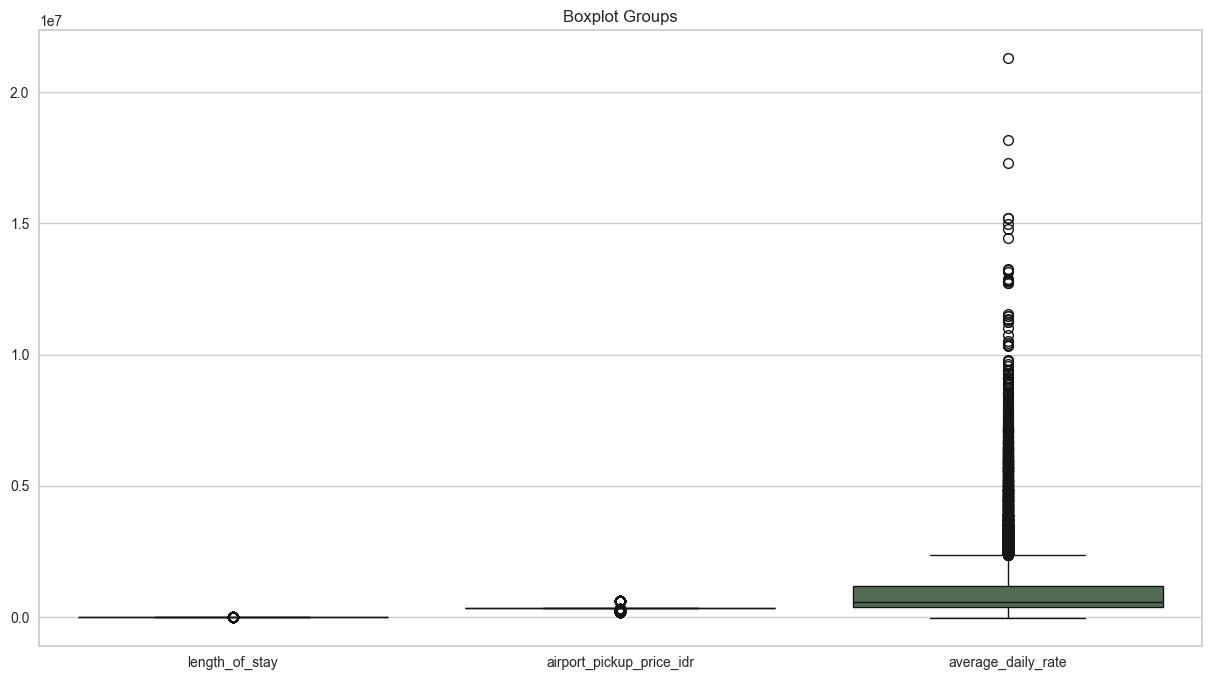

Lower, Upper Bounds, and Median for Quartiles:
+--------------------------+-------------+-------------+-----------+
|          Column          | Lower Bound | Upper Bound |   Median  |
+--------------------------+-------------+-------------+-----------+
|      length_of_stay      |     1.0     |     6.0     |    2.00   |
| airport_pickup_price_idr |   325000.0  |   325000.0  | 325000.00 |
|    average_daily_rate    |   357199.5  |  2374200.75 | 558818.00 |
+--------------------------+-------------+-------------+-----------+


In [22]:
columns = df[['length_of_stay', 'airport_pickup_price_idr','average_daily_rate']]
pal = ['#163020', '#3A4D39', '#4F6F52', '#739072', '#98BF97', '#B1DEAF', '#B9E8B7', '#C7F7C6']

plt.figure(figsize=(15, 8))
sns.boxplot(data=columns,palette=pal)
plt.title('Boxplot Groups')
plt.show()

table_bounds = PrettyTable()
table_bounds.field_names = ["Column", "Lower Bound", "Upper Bound", "Median"]

for column in columns.columns:
    Q1 = columns[column].quantile(0.25)
    Q2 = columns[column].median()
    Q3 = columns[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1
    upper_bound = Q3 + 1.5 * IQR

    table_bounds.add_row([column, f'{lower_bound}', f'{upper_bound}', f'{Q2:.2f}'])

print("Lower, Upper Bounds, and Median for Quartiles:")
print(table_bounds)

In [23]:
cols = [col for col in df.columns if df[col].dtype != 'object'][1:]
corr = df[cols].corr()

fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='<b>Correlation Matrix (cont. features)<b>',
                  title_x=0.5,
                  titlefont={'size': 24},
                  width=1000, height=750,
                  margin=dict(l=150, r=100, b=100, t=100),
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()


## **4 Data Pre-Prosessing**

**Data Pre-Prosessing** adalah tahapan untuk menghilangkan beberapa permasalahan yang bisa mengganggu saat pemrosesan data. Hal tersebut karena banyak data yang formatnya tidak konsisten. Data preprocessing merupakan teknik sebelum melakukan modeling.


In [24]:
def replace_outliers(column, lower_bound, upper_bound):
    mask = (column < lower_bound) | (column > upper_bound)
    column[mask] = column.clip(lower=lower_bound, upper=upper_bound)

# Define columns and their corresponding bounds
columns_and_bounds = {
    'average_daily_rate': (357199.5, 2374200.75 )}

# Replace outliers for each column
for column, (lower_bound, upper_bound) in columns_and_bounds.items():
    replace_outliers(raw_data['average_daily_rate'], lower_bound, upper_bound)


In [25]:

raw_data['booking_check_in'] = pd.to_datetime(raw_data['booking_check_in'])
raw_data['booking_check_out'] = pd.to_datetime(raw_data['booking_check_out'])

def convert_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    if 'hour' in time_str:
        hours = int(time_str.split()[0])
        return hours * 60
    elif 'minute' in time_str:
        minutes = int(time_str.split()[0])
        return minutes
    else:
        return None

raw_data['area_distance_to_airport'] = raw_data['area_distance_to_airport'].apply(convert_to_minutes)

raw_data['booking_check_in_date'] = raw_data['booking_check_in'].dt.day
raw_data['booking_check_in_month'] = raw_data['booking_check_in'].dt.month
raw_data['booking_check_in_year'] = raw_data['booking_check_in'].dt.year

raw_data['booking_check_out_date'] = raw_data['booking_check_out'].dt.day
raw_data['booking_check_out_month'] = raw_data['booking_check_out'].dt.month
raw_data['booking_check_out_year'] = raw_data['booking_check_out'].dt.year



In [26]:
raw_data = raw_data.drop(['booking_id','booking_check_in','booking_check_out','booking_received_timestamp','status','booking_window'
], axis = 1)


In [27]:
raw_data.isnull().sum()

booking_status                  0
booking_guest_number        47810
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment            50795
review_sentiment_score      50795
length_of_stay                  0
average_daily_rate              0
unit_id                        14
bedroom                       513
bathroom                    11595
beds                        11595
capacity                    15556
property_id                   447
wifi                        14743
tv                          14743
cable_tv                    14743
ac                          14743
workspace                   14743
pool                        14743
parking                     14743
gym                         14743
kitchen                     14743
area_id                       578
area_name                     578
area_distance_to_airport     1469
airport_pickup_price_idr     8781
booking_check_in_date           0
booking_check_

In [28]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk kolom unit_id
raw_data['listing_id'] = label_encoder.fit_transform(raw_data['listing_id'])

raw_data['review_sentiment'] = label_encoder.fit_transform(raw_data['review_sentiment'])



raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['unit_id'] = label_encoder.fit_transform(raw_data['unit_id'])

raw_data['property_id'] = label_encoder.fit_transform(raw_data['property_id'])

raw_data['area_id'] = label_encoder.fit_transform(raw_data['area_id'])

raw_data['area_name'] = label_encoder.fit_transform(raw_data['area_name'])

print(raw_data[['unit_id', 'review_sentiment','listing_id','property_id', 'area_id', 'area_name']].head())


   unit_id  review_sentiment  listing_id  property_id  area_id  area_name
0      335                 2        1817          154       11         13
1      334                 2        1893          192       11         13
2      334                 2        1893          192       11         13
3      335                 2        1817          154       11         13
4      335                 2        1817          154       11         13


In [29]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['bedroom', 'bathroom', 'beds', 'capacity','wifi','tv','cable_tv','ac','workspace','pool',
                          'booking_guest_number','parking','gym','kitchen']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
length_of_stay                  0
average_daily_rate              0
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
area_id                         0
area_name                       0
area_distance_to_airport     1469
airport_pickup_price_idr     8781
boo

In [30]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Memilih kolom yang akan digunakan untuk clustering
columns_for_clustering = ['booking_check_in_date','booking_check_in_month','booking_check_in_year',
                          'booking_check_in_year','booking_check_out_month','booking_check_out_year']

# Mengisi nilai yang hilang sementara dengan SimpleImputer (mean strategy)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(raw_data[columns_for_clustering])

# Normalisasi data sebelum clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Menentukan jumlah cluster (misalnya, 5)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Menambahkan kolom cluster ke DataFrame asli
raw_data['cluster'] = clusters

# Mengisi nilai yang hilang dengan centroid dari masing-masing cluster
for column in columns_for_clustering:
    for cluster in range(5):
        cluster_mean = raw_data[raw_data['cluster'] == cluster][column].mean()
        raw_data.loc[(raw_data[column].isnull()) & (raw_data['cluster'] == cluster), column] = cluster_mean

# Mengecek kembali nilai yang hilang setelah imputasi
print("\nJumlah nilai yang hilang setelah imputasi:\n", raw_data.isnull().sum())

# Menghapus kolom cluster karena sudah tidak diperlukan
raw_data.drop(columns=['cluster'], inplace=True)


Jumlah nilai yang hilang setelah imputasi:
 booking_status                  0
booking_guest_number            0
booking_earned                  0
booking_currency                0
listing_id                      0
review_sentiment                0
review_sentiment_score      50795
length_of_stay                  0
average_daily_rate              0
unit_id                         0
bedroom                         0
bathroom                        0
beds                            0
capacity                        0
property_id                     0
wifi                            0
tv                              0
cable_tv                        0
ac                              0
workspace                       0
pool                            0
parking                         0
gym                             0
kitchen                         0
area_id                         0
area_name                       0
area_distance_to_airport     1469
airport_pickup_price_idr     8781
boo

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
columns_to_impute = [ 'airport_pickup_price_idr','area_distance_to_airport','review_sentiment_score']
imputer = IterativeImputer(max_iter=10, random_state=0)

# Memilih subset data untuk kolom-kolom yang akan diimputasi
data_to_impute = raw_data[columns_to_impute]

# Melakukan imputasi
data_imputed = imputer.fit_transform(data_to_impute)

# Mengganti nilai yang telah diimputasi kembali ke dataset asli
raw_data[columns_to_impute] = data_imputed

# Menampilkan hasil imputasi
print("Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:")
print(raw_data[columns_to_impute].head())
raw_data.isnull().sum()

Hasil imputasi untuk kolom area_distance_to_airport dan airport_pickup_price_idr:
   airport_pickup_price_idr  area_distance_to_airport  review_sentiment_score
0                  325000.0                      45.0                0.655466
1                  325000.0                      45.0                0.656976
2                  325000.0                      45.0                0.687372
3                  325000.0                      45.0                0.979358
4                  325000.0                      45.0                0.670770


booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
length_of_stay              0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month     0
booking_ch

In [32]:
raw_data['average_daily_rate'] = raw_data['average_daily_rate'].astype('int64')

# Jika Anda ingin melihat hasilnya
print(raw_data['average_daily_rate'].dtypes)


int64


In [33]:
data = raw_data
data.describe()

,booking_status,booking_guest_number,booking_earned,booking_currency,listing_id,review_sentiment,review_sentiment_score,length_of_stay,average_daily_rate,unit_id,...,area_id,area_name,area_distance_to_airport,airport_pickup_price_idr,booking_check_in_date,booking_check_in_month,booking_check_in_year,booking_check_out_date,booking_check_out_month,booking_check_out_year
count,56825.000000,56825.000000,5.682500e+04,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000,5.682500e+04,56825.000000,...,56825.00000,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000,56825.000000
mean,1.063968,2.601783,1.571828e+06,1.233295,883.657228,2.876392,0.703427,2.839366,8.579124e+05,504.609872,...,7.10960,11.228016,53.894294,325757.068701,15.896507,6.641443,2017.932495,15.883907,6.627030,2017.941487
std,0.281550,1.064270,3.034301e+06,0.427279,628.129706,0.397881,0.177158,2.982119,6.238073e+05,317.566226,...,5.51472,7.999349,12.161387,38197.363826,8.795639,3.001101,1.108479,8.841584,3.003492,1.106567
min,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,-0.998203,-30.000000,3.571990e+05,0.000000,...,0.00000,0.000000,29.637229,195000.000000,1.000000,1.000000,2014.000000,1.000000,1.000000,2014.000000
25%,1.000000,2.311209,6.450000e+02,1.000000,325.000000,3.000000,0.564020,1.000000,3.571990e+05,275.000000,...,2.00000,4.000000,45.000000,325000.000000,8.000000,4.000000,2017.000000,8.000000,4.000000,2017.000000
50%,1.000000,2.496766,7.992800e+05,1.000000,840.000000,3.000000,0.722867,2.000000,5.588180e+05,466.000000,...,7.00000,9.000000,60.000000,325000.000000,16.000000,7.000000,2018.000000,16.000000,7.000000,2018.000000
75%,1.000000,2.496766,1.778367e+06,1.000000,1449.000000,3.000000,0.805748,3.000000,1.164000e+06,701.000000,...,9.00000,21.000000,60.000000,325000.000000,23.000000,9.000000,2019.000000,24.000000,9.000000,2019.000000
max,6.000000,30.000000,9.429215e+07,3.000000,1907.000000,3.000000,1.238226,349.000000,2.374200e+06,1253.000000,...,25.00000,25.000000,120.000000,585000.000000,31.000000,12.000000,2019.000000,31.000000,12.000000,2019.000000


In [34]:
import pandas as pd

# Misalkan Anda memiliki DataFrame yang disebut 'raw_data' dan Anda ingin menyimpannya ke dalam file CSV
# Anda bisa menggantinya dengan nama DataFrame yang sesuai

# Simpan DataFrame ke file CSV
data.to_csv('nama_file.csv', index=False)


In [35]:
data.isnull().sum()

booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
length_of_stay              0
average_daily_rate          0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month     0
booking_ch

In [36]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur-fitur dan target
X = data.drop(columns=['average_daily_rate'])
y = data['average_daily_rate']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan dimensi dari data latih dan data uji
print("Dimensi data latih:", X_train.shape, y_train.shape)
print("Dimensi data uji:", X_test.shape, y_test.shape)

Dimensi data latih: (45460, 33) (45460,)
Dimensi data uji: (11365, 33) (11365,)


In [37]:
# apply transformation since it is skewed as we saw in the eda phase


In [38]:
y = data['average_daily_rate']
x = data.drop('average_daily_rate', axis=1)

In [39]:
import numpy as np

# Memeriksa apakah ada nilai NaN atau infinity dalam y_train
print(np.isnan(X).sum())  # Jumlah nilai NaN
print(np.isinf(x).sum())  # Jumlah nilai infinity


booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
length_of_stay              0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month     0
booking_check_out_year      0
dtype: int

In [40]:
# Identifikasi nilai yang hilang
missing_values = x.isnull().sum()
print("Jumlah nilai yang hilang dalam setiap kolom:\n", missing_values)

# Penanganan nilai yang hilang (contoh: menghapus baris yang mengandung nilai yang hilang)
x_cleaned = x.dropna()

# Sekarang, Anda bisa melanjutkan dengan menggunakan fungsi boxcox_normmax pada x_cleaned


Jumlah nilai yang hilang dalam setiap kolom:
 booking_status              0
booking_guest_number        0
booking_earned              0
booking_currency            0
listing_id                  0
review_sentiment            0
review_sentiment_score      0
length_of_stay              0
unit_id                     0
bedroom                     0
bathroom                    0
beds                        0
capacity                    0
property_id                 0
wifi                        0
tv                          0
cable_tv                    0
ac                          0
workspace                   0
pool                        0
parking                     0
gym                         0
kitchen                     0
area_id                     0
area_name                   0
area_distance_to_airport    0
airport_pickup_price_idr    0
booking_check_in_date       0
booking_check_in_month      0
booking_check_in_year       0
booking_check_out_date      0
booking_check_out_month 

In [41]:
#checking high skewed (> 0.5)
skew_check = x.apply(lambda x: abs(skew(x)))
skew_check = skew_check.reset_index(name='skew')
skewness = skew_check[skew_check['skew']>0.5]
skewed_feats = skewness['index']
skewness

,index,skew
0,booking_status,5.886724
1,booking_guest_number,6.371349
2,booking_earned,7.340039
3,booking_currency,1.332097
5,review_sentiment,4.094981
6,review_sentiment_score,2.933164
7,length_of_stay,33.478140
8,unit_id,0.585091
9,bedroom,2.221732
10,bathroom,4.316647


In [42]:
from sklearn.preprocessing import MinMaxScaler
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi Min-Max pada fitur numerik
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Gabungkan kembali fitur yang sudah dinormalisasi dengan label
data_normalized = pd.concat([x_scaled, y.reset_index(drop=True)], axis=1)

In [43]:
# apply polynomial since the features are not very linear with the label, and set the degree to 2 to prevent overfitting
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(x)

### MODELING

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold
import pandas as pd

class Model:
    def __init__(self, x, y, n_splits, repeated, rdm_seed, model, params):
        self.x = x
        self.y = y
        self.n_splits = n_splits
        self.repeated = repeated
        self.rdm_seed = rdm_seed
        self.model = model
        self.params = params
        self.cv_splitter = None
        self.best_model = None
        self.best_rmse = float('inf')
        self.best_mae = float('inf')  # Initialize best_mae attribute

    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x[train_idx]
            X_val = self.x[val_idx]
            y_train = self.y[train_idx]
            y_val = self.y[val_idx]
            yield X_train, X_val, y_train, y_val

    def fit(self, key):
        mae_per_fold = []
        r2_per_fold = []
        self.cv_splitter = self.split_data()

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            model = self.model(**self.params)  # Define model outside if-elif block
            if key == 'xgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100, verbose=False)
            elif key == 'adaboost':
                model = self._fit_adaboost(X_train, y_train)
            elif key == 'lgb':
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae')
            elif key == 'cat':
                model = CatBoostRegressor(**self.params, loss_function='MAE')
                model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
            elif key == 'bayesian_ridge':
                model = BayesianRidge(**self.params)
                model.fit(X_train, y_train)
            elif key in ['linear', 'ridge', 'lasso', 'svr']:
                model.fit(X_train, y_train)

            y_val_preds = model.predict(X_val)
            mae = mean_absolute_error(y_val, y_val_preds)
            r2 = r2_score(y_val, y_val_preds)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")
            mae_per_fold.append(mae)
            r2_per_fold.append(r2)

            # Select the model with the lowest MAE
            if mae < self.best_mae:
                self.best_mae = mae
                self.best_model = model

        print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
        print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

    def predict(self):
        if self.best_model is None:
            raise ValueError("Model has not been trained yet. Call 'fit()' method first.")

        all_mae = []
        all_r2 = []
        y_preds_list = []
        y_val_list = []

        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.split_data()):
            y_preds = self.best_model.predict(X_val)
            mae = mean_absolute_error(y_val, y_preds)
            r2 = r2_score(y_val, y_preds)
            all_mae.append(mae)
            all_r2.append(r2)
            y_preds_list.append(y_preds)
            y_val_list.append(y_val)

            print(f"FOLD {fold} | MAE: {mae:.5f} | R2: {r2:.5f}")

        avg_mae = np.mean(all_mae)
        avg_r2 = np.mean(all_r2)
        print(f'Average MAE Val: {avg_mae:.5f} | Average R2 Val: {avg_r2:.5f}')
        return all_mae, all_r2, y_preds_list, y_val_list

    def feature_importance(self):
        feature_importances = self.best_model.feature_importances_
        n_original_features = len(x.columns)
        polynomial_feature_indices = np.arange(n_original_features, self.x.shape[1])
        polynomial_feature_names = [f"Poly_{i}" for i in polynomial_feature_indices]
        all_feature_names = list(x.columns) + polynomial_feature_names
        feature_importances_df = pd.DataFrame({'feature_weight': feature_importances}, index=all_feature_names)
        feature_importances_df = feature_importances_df.sort_values('feature_weight', ascending=False)
        return feature_importances_df

    def inverse(self, y_preds, y_val):
        y_preds = np.expm1(y_preds)
        y_val = np.expm1(y_val)
        return y_preds, y_val


In [45]:
    def split_data(self):
        cv = RepeatedKFold(n_splits=self.n_splits, n_repeats=self.repeated, random_state=self.rdm_seed)
        for fold, (train_idx, val_idx) in enumerate(cv.split(self.x, self.y)):
            X_train = self.x.iloc[train_idx]
            X_val = self.x.iloc[val_idx]
            y_train = self.y.iloc[train_idx]
            y_val = self.y.iloc[val_idx]
            yield X_train, X_val, y_train, y_val


In [46]:
    def fit(self, key):
        if key == 'xgb':
            self._fit_xgb()
        elif key == 'lgb':
            self._fit_lgb()
        elif key == 'cat':
            self._fit_cat()



In [47]:
def _fit_xgb(self):
    import xgboost as xgb
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = xgb.XGBRegressor(**self.params)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100, verbose=False)
        eval_results = model.evals_result()
        val_mae = eval_results['validation_0']['mae'][-1]
        
        y_val_preds = model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_preds)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R2: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

In [48]:
    def _fit_adaboost(self, X_train, y_train):
        from sklearn.ensemble import AdaBoostRegressor
        base_estimator = DecisionTreeRegressor(max_depth=1)
        adaboost = AdaBoostRegressor(base_estimator=base_estimator, **self.params)
        adaboost.fit(X_train, y_train)
        return adaboost

In [49]:
def _fit_lgb(self):
    import lightgbm as lgb
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = lgb.LGBMRegressor(**self.params)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric='mae', early_stopping_rounds=100)
        eval_results = model.evals_result_
        val_mae = eval_results['valid_0']['l1'][-1]
        
        y_val_preds = model.predict(X_val)
        val_r2 = r2_score(y_val, y_val_preds)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R2: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R2 across all folds: {np.mean(r2_per_fold):.5f}")

In [50]:
def _fit_cat(self):
    from catboost import CatBoostRegressor
    from sklearn.metrics import mean_absolute_error, r2_score
    rmse_per_fold = []
    mae_per_fold = []
    r2_per_fold = []
    self.cv_splitter = self.split_data()

    for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
        model = CatBoostRegressor(**self.params, loss_function='MAE')
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        y_pred = model.predict(X_val)

        val_mae = mean_absolute_error(y_val, y_pred)
        val_r2 = r2_score(y_val, y_pred)

        print(f"FOLD {fold} | MAE: {val_mae:.5f} | R²: {val_r2:.5f}")
        mae_per_fold.append(val_mae)
        r2_per_fold.append(val_r2)

        if val_mae < self.best_mae:
            self.best_mae = val_mae
            self.best_model = model

    print(f"Average MAE across all folds: {np.mean(mae_per_fold):.5f}")
    print(f"Average R² across all folds: {np.mean(r2_per_fold):.5f}")

In [51]:
    def predict(self):
        self.cv_splitter = self.split_data()
        all_rmse = []
        all_rmse_train = []
        for fold, (X_train, X_val, y_train, y_val) in enumerate(self.cv_splitter):
            if self.best_model is None:
                raise ValueError("Model has not been trained yet. Call 'fit()' method first.")
            else:
                y_preds = self.best_model.predict(X_val)
                rmse = np.sqrt(mean_squared_error(y_val, y_preds))
                all_rmse.append(rmse)

                train_preds = self.best_model.predict(X_train)
                train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
                all_rmse_train.append(train_rmse)
                print(f"FOLD {fold} | RMSE: {rmse:.5f}")
        avg_rmse = np.mean(all_rmse)
        avg_rmse_train = np.mean(all_rmse_train)
        print(f'Average RMSE Val: {avg_rmse} | Average RMSE Train: {avg_rmse_train}')
        return all_rmse, y_preds, y_val


In [ ]:
params = {'random_state':42}


model_xgb = Model(X_train_poly, y, 10, 3, 42, XGBRegressor, params)
model_xgb.fit('xgb')

feature_importances_xgb = model_xgb.feature_importance()


all_mae_xgb,all_r2_xgb, y_preds, y_val = model_xgb.predict()

FOLD 0 | MAE: 28331.98075 | R2: 0.99192
FOLD 1 | MAE: 27707.37801 | R2: 0.99256
FOLD 2 | MAE: 29140.98138 | R2: 0.99194
FOLD 3 | MAE: 28886.58329 | R2: 0.99244
FOLD 4 | MAE: 29696.46883 | R2: 0.99132
FOLD 5 | MAE: 28605.90238 | R2: 0.99230
FOLD 6 | MAE: 28167.19311 | R2: 0.99269
FOLD 7 | MAE: 28833.88769 | R2: 0.99154
FOLD 8 | MAE: 28779.70836 | R2: 0.99223
FOLD 9 | MAE: 27604.50034 | R2: 0.99160
FOLD 10 | MAE: 28697.25173 | R2: 0.99184
FOLD 11 | MAE: 27419.12899 | R2: 0.99272
FOLD 12 | MAE: 28688.45604 | R2: 0.99148
FOLD 13 | MAE: 29163.72494 | R2: 0.99199
FOLD 14 | MAE: 26923.40678 | R2: 0.99397
FOLD 15 | MAE: 27548.34030 | R2: 0.99310
FOLD 16 | MAE: 28422.15954 | R2: 0.99209
FOLD 17 | MAE: 26877.06685 | R2: 0.99341
FOLD 18 | MAE: 28074.39642 | R2: 0.99279
FOLD 19 | MAE: 28518.60664 | R2: 0.99202
FOLD 20 | MAE: 26467.72803 | R2: 0.99331
FOLD 21 | MAE: 26918.07417 | R2: 0.99325
FOLD 22 | MAE: 28721.39615 | R2: 0.99324
FOLD 23 | MAE: 28235.93444 | R2: 0.99320
FOLD 24 | MAE: 26572.16594

In [ ]:
params = {'random_state':42,'verbosity':-1}
model_lgbm = Model(X_train_poly, y, 10, 3, 42, lgbm.LGBMRegressor, params)


# Fit the model using RepeatedKFold
model_lgbm.fit('lgb')

all_mae_lgb,all_r2_lgb, y_preds, y_val = model_lgbm.predict()
feature_importances_lgbm = model_lgbm.feature_importance()


FOLD 0 | MAE: 30181.57651 | R2: 0.99238
FOLD 1 | MAE: 31271.60627 | R2: 0.99236
FOLD 2 | MAE: 31312.77494 | R2: 0.99220
FOLD 3 | MAE: 31733.91967 | R2: 0.99196
FOLD 4 | MAE: 31646.20306 | R2: 0.99205
FOLD 5 | MAE: 31033.08218 | R2: 0.99235
FOLD 6 | MAE: 31190.29280 | R2: 0.99237
FOLD 7 | MAE: 30235.74692 | R2: 0.99253
FOLD 8 | MAE: 30315.09179 | R2: 0.99229
FOLD 9 | MAE: 30923.58655 | R2: 0.99155
FOLD 10 | MAE: 32210.84958 | R2: 0.99217
FOLD 11 | MAE: 30945.32292 | R2: 0.99221
FOLD 12 | MAE: 30928.77385 | R2: 0.99182
FOLD 13 | MAE: 31506.63826 | R2: 0.99138
FOLD 14 | MAE: 31009.06298 | R2: 0.99291
FOLD 15 | MAE: 30051.15097 | R2: 0.99272
FOLD 16 | MAE: 31772.57798 | R2: 0.99155
FOLD 17 | MAE: 30624.16514 | R2: 0.99301
FOLD 18 | MAE: 30238.24160 | R2: 0.99257
FOLD 19 | MAE: 30977.20200 | R2: 0.99153
FOLD 20 | MAE: 31272.44847 | R2: 0.99191
FOLD 21 | MAE: 31269.10356 | R2: 0.99164
FOLD 22 | MAE: 31016.82715 | R2: 0.99220
FOLD 23 | MAE: 29452.77635 | R2: 0.99365
FOLD 24 | MAE: 31090.48627

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Parameter untuk Ridge Regression
params_ridge = {'alpha': 1.0}
model_ridge = Model(X_train_poly, y, 10, 3, 42, Ridge, params_ridge)
model_ridge.fit('ridge')
all_mae_ridge,all_r2_ridge, y_preds_ridge, y_val_ridge = model_ridge.predict()

FOLD 0 | MAE: 173697.11565 | R2: 0.79054
FOLD 1 | MAE: 177077.89663 | R2: 0.81214
FOLD 2 | MAE: 176047.10512 | R2: 0.81145
FOLD 3 | MAE: 173071.27688 | R2: 0.82744
FOLD 4 | MAE: 178830.28747 | R2: 0.70660
FOLD 5 | MAE: 171388.40691 | R2: 0.80384
FOLD 6 | MAE: 172515.56924 | R2: 0.80491
FOLD 7 | MAE: 178205.75550 | R2: 0.79783
FOLD 8 | MAE: 175349.31068 | R2: 0.80855
FOLD 9 | MAE: 181288.53384 | R2: 0.09403
FOLD 10 | MAE: 173856.69647 | R2: 0.80545
FOLD 11 | MAE: 174088.14907 | R2: 0.79430
FOLD 12 | MAE: 179791.48767 | R2: 0.70954
FOLD 13 | MAE: 173247.48431 | R2: 0.81283
FOLD 14 | MAE: 173825.91214 | R2: 0.82341
FOLD 15 | MAE: 175194.23359 | R2: 0.80961
FOLD 16 | MAE: 176049.24719 | R2: 0.80017
FOLD 17 | MAE: 175189.47476 | R2: 0.81122
FOLD 18 | MAE: 172680.90446 | R2: 0.81385
FOLD 19 | MAE: 181711.76291 | R2: 0.60991
FOLD 20 | MAE: 174098.76072 | R2: 0.80323
FOLD 21 | MAE: 172786.23055 | R2: 0.81719
FOLD 22 | MAE: 174873.95186 | R2: 0.81965
FOLD 23 | MAE: 174448.67923 | R2: 0.79528
FO

In [ ]:
# Parameter untuk Linear Regression
params_linear = {}
model_linear = Model(X_train_poly, y, 10, 3, 42, LinearRegression, params_linear)
model_linear.fit('linear')

all_mae_linear,all_r2_linier, y_preds_linear, y_val_linear = model_linear.predict()

FOLD 0 | MAE: 178435.25359 | R2: 0.78681
FOLD 1 | MAE: 182940.23761 | R2: 0.80111
FOLD 2 | MAE: 178786.95696 | R2: 0.80905
FOLD 3 | MAE: 174537.76410 | R2: 0.82592
FOLD 4 | MAE: 181242.58497 | R2: 0.70898
FOLD 5 | MAE: 184890.79234 | R2: 0.78905
FOLD 6 | MAE: 175292.65841 | R2: 0.79902
FOLD 7 | MAE: 183646.63879 | R2: 0.78919
FOLD 8 | MAE: 179945.11583 | R2: 0.80581
FOLD 9 | MAE: 191535.92007 | R2: -0.17904
FOLD 10 | MAE: 177770.60813 | R2: 0.80116
FOLD 11 | MAE: 178469.87365 | R2: 0.78665
FOLD 12 | MAE: 181526.15195 | R2: 0.69374
FOLD 13 | MAE: 180047.01023 | R2: 0.80266
FOLD 14 | MAE: 176313.37998 | R2: 0.81979
FOLD 15 | MAE: 175754.28109 | R2: 0.81042
FOLD 16 | MAE: 177883.48437 | R2: 0.79654
FOLD 17 | MAE: 180074.02982 | R2: 0.80627
FOLD 18 | MAE: 175691.78399 | R2: 0.80948
FOLD 19 | MAE: 184795.14893 | R2: 0.78276
FOLD 20 | MAE: 187269.91936 | R2: 0.78638
FOLD 21 | MAE: 179969.75209 | R2: 0.80653
FOLD 22 | MAE: 177921.45551 | R2: 0.81552
FOLD 23 | MAE: 182062.21916 | R2: 0.76922
F

In [ ]:
a = feature_importances_xgb.reset_index()
feature_importances_xgb = a[a['index'].isin(x.columns)]

# Ambil 10 fitur teratas
top_10_features = feature_importances_xgb.nlargest(10, 'feature_weight')

fig = px.bar(
    x=top_10_features['feature_weight'],
    y=top_10_features['index'],
    orientation='h',
    width=700,
    height=700,
)

fig.update_layout(
    autosize=False,
    title="Top 10 Feature Importances by XGB",
    font_family="San Serif",
    titlefont={'size': 20},
    margin=dict(l=150, r=100, b=100, t=100),
    xaxis_title="Feature Weight",
    yaxis_title=""
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

colors = ['gray',] * 10
colors[0]  = 'lightseagreen'
colors[-1] = 'lightsalmon'
fig.update_traces(marker_color=colors, marker_line_color=None,
                   opacity=None)

fig.show()


In [ ]:
a = feature_importances_lgbm.reset_index()
feature_importances_lgbm = a[a['index'].isin(x.columns)]

# Ambil 10 fitur teratas
top_10_features = feature_importances_lgbm.nlargest(10, 'feature_weight')

fig = px.bar(
    x=top_10_features['feature_weight'],
    y=top_10_features['index'],
    orientation='h',
    width=700,
    height=700,
)

fig.update_layout(
    autosize=False,
    title="Top 10 Feature Importances by XGB",
    font_family="San Serif",
    titlefont={'size': 20},
    margin=dict(l=150, r=100, b=100, t=100),
    xaxis_title="Feature Weight",
    yaxis_title=""
)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending')

colors = ['gray',] * 10
colors[0]  = 'lightseagreen'
colors[-1] = 'lightsalmon'
fig.update_traces(marker_color=colors, marker_line_color=None,
                   opacity=None)

fig.show()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 2048)           │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,859,009 (10.91 MB)

 Trainable params: 2,859,009 (10.91 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 55s 45ms/step - loss: 318460100608.0000 - mae: 372993.0938 - val_loss: 135493861376.0000 - val_mae: 246721.5000
Epoch 2/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - loss: 130248400896.0000 - mae: 245660.5000 - val_loss: 110194049024.0000 - val_mae: 213363.8125
Epoch 3/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 51s 45ms/step - loss: 106349248512.0000 - mae: 215230.3750 - val_loss: 81314676736.0000 - val_mae: 171659.4219
Epoch 4/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 52s 46ms/step - loss: 82794905600.0000 - mae: 184347.2812 - val_loss: 74874224640.0000 - val_mae: 155617.4531
Epoch 5/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 52s 46ms/step - loss: 70719021056.0000 - mae: 165218.7031 - val_loss: 67033362432.0000 - val_mae: 146973.0781
Epoch 6/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 54s 48ms/step - loss: 67205603328.0000 - mae: 159502.7969 - val_loss: 56484139008.0000 - val_mae: 133618.1406
Epoch 7/50
1137/1137 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - loss: 60595556352.0000 - 

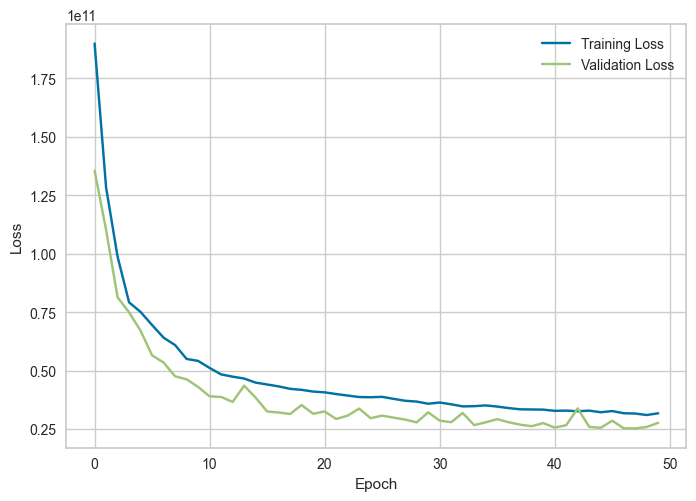

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the TensorFlow model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(2048, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(0.3),  # Adding dropout for regularization
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.3),  # Adding dropout for regularization
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Adding dropout for regularization
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mean_squared_error',
                  metrics=['mae'])
    return model

# Custom callback to stop training when target is reached
class TargetCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 30000 and logs.get('val_mae') < 30000:  # Adjusting the target MAE
            print("\n\nTarget tercapai\n")
            self.model.stop_training = True

# Build the model
model = build_model()

# Print the model summary
model.summary()

# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define the custom callback
target_callback = TargetCallback()

# Train the model with 50 epochs to give more room for improvement
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, target_callback])

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss (MSE): {test_loss}')
print(f'Test MAE: {test_mae}')

# If you want to make predictions
predictions = model.predict(X_test_scaled)

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
